# Calculating the distance bikes travel 

In [1]:
#Import Dependencies
import pandas as pd 
import folium 
import matplotlib.pyplot as plt 
import os
from geopy.distance import great_circle
None

In [2]:
#Read in the divvy_data_2017 file which contains all of the rides and drop the unnecessary columns
csv_file = os.path.join("outputs/divvy_data_2017.csv")
master_data_2017 = pd.read_csv(csv_file)
data = master_data_2017.drop(columns = ["usertype","gender","birthyear","Unnamed: 0"])
data = data.rename(columns = {"from_station_id":"id"})

#Read in the Station data file and drop the unnecessary columns
csv_station = os.path.join("Data/Divvy_Stations_2017_Q3Q4.csv")
station_df = pd.read_csv(csv_station)
station_drop = station_df.drop(columns = ['Unnamed: 7','dpcapacity','online_date','name','city'])

In [3]:
#Merge the master ride data on the station data TWICE to get the lat and lang for both the to and from stations
#MERGE the "TO STATION"
merged_df = data.merge(station_drop, on="id")
merged_df = merged_df.rename(columns = {'id':"from_id","to_station_id":'id'})

#MERGE AGAIN on the "FROM STATION"
merged_df = merged_df.merge(station_drop, on='id')
merged_df = merged_df.rename(columns ={"id":"to_id"})
#Preview the data
merged_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_id,from_station_name,to_id,to_station_name,month,latitude_x,longitude_x,latitude_y,longitude_y
0,13518905,2017-03-31 23:59:07,2017-04-01 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,3,41.885637,-87.641823,41.855136,-87.654127
1,13144289,2017-02-04 00:26:16,2017-02-04 00:42:14,1716,958,66,Clinton St & Lake St,171,May St & Cullerton St,2,41.885637,-87.641823,41.855136,-87.654127
2,13721758,2017-04-20 02:30:19,2017-04-20 02:45:13,1135,894,66,Clinton St & Lake St,171,May St & Cullerton St,4,41.885637,-87.641823,41.855136,-87.654127
3,13695538,2017-04-18 01:32:11,2017-04-18 01:46:27,1701,856,66,Clinton St & Lake St,171,May St & Cullerton St,4,41.885637,-87.641823,41.855136,-87.654127
4,15718061,2017-08-10 16:40:12,2017-08-10 17:04:31,5931,1459,199,Wabash Ave & Grand Ave,171,May St & Cullerton St,8,41.891466,-87.626761,41.855136,-87.654127


In [4]:
def distance(row):
    one = (row["latitude_x"],row["longitude_x"])
    two = (row["latitude_y"], row["longitude_y"])
    return great_circle(one, two).miles

In [5]:
merged_df['trip_distance'] = merged_df.apply(distance, axis=1)
distance_df = merged_df[['month','trip_distance','start_time','end_time']]

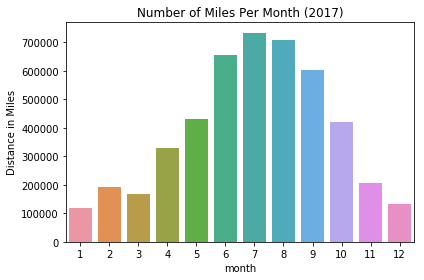

In [6]:
import seaborn as sns
distance_df = distance_df.groupby('month').sum()
sns.barplot(distance_df.index, distance_df['trip_distance'])
plt.title('Number of Miles Per Month (2017)')
plt.ylabel('Distance in Miles')
plt.tight_layout()
plt.savefig('outputs/MilesPerMonth.png')